In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyupbit
from sklearn import preprocessing

## 상장일-한달

In [2]:
ticker = 'KRW-NEAR'
interval = 'day'
to = '2022-01-16'
near = pd.DataFrame(pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to))

near.reset_index(inplace=True)
near = near.rename(columns={'index':'date'})
pd.options.display.float_format = '{:.2f}'.format
near

,date,open,high,low,close,volume,value
0,2021-12-15 09:00:00,49810.00,65000.00,10350.00,12410.00,32488905.84,466530899671.64
1,2021-12-16 09:00:00,12420.00,13340.00,11510.00,11590.00,10266687.36,127249489615.81
2,2021-12-17 09:00:00,11590.00,11730.00,10450.00,10610.00,5232049.38,58010338203.63
3,2021-12-18 09:00:00,10610.00,10650.00,10160.00,10520.00,2229216.58,23165359732.95
4,2021-12-19 09:00:00,10520.00,12060.00,10390.00,11240.00,7394495.47,84017864966.03
5,2021-12-20 09:00:00,11250.00,11300.00,10340.00,10500.00,2183190.53,23549015795.56
6,2021-12-21 09:00:00,10500.00,11500.00,10490.00,11340.00,2963896.06,32222566527.38
7,2021-12-22 09:00:00,11350.00,14480.00,11130.00,13330.00,18721431.42,249970109468.69
8,2021-12-23 09:00:00,13320.00,17580.00,13170.00,16640.00,50242950.86,811132909508.01
9,2021-12-24 09:00:00,16650.00,19400.00,16440.00,18380.00,56525031.46,1018842775183.39


In [3]:
near = near.astype({'open': int, 'high': int, 'low': int, 'close':int})
near.drop(near.columns[[5,6]], axis=1, inplace=True)
near

,date,open,high,low,close
0,2021-12-15 09:00:00,49810,65000,10350,12410
1,2021-12-16 09:00:00,12420,13340,11510,11590
2,2021-12-17 09:00:00,11590,11730,10450,10610
3,2021-12-18 09:00:00,10610,10650,10160,10520
4,2021-12-19 09:00:00,10520,12060,10390,11240
5,2021-12-20 09:00:00,11250,11300,10340,10500
6,2021-12-21 09:00:00,10500,11500,10490,11340
7,2021-12-22 09:00:00,11350,14480,11130,13330
8,2021-12-23 09:00:00,13320,17580,13170,16640
9,2021-12-24 09:00:00,16650,19400,16440,18380


In [4]:
exchange_rate = pd.read_csv('data/최종/환율_ECOS_TABLE_20220119_113130.csv', names=['date', 'won'], encoding='cp949')
exchange_rate

,date,won
0,2020-12-29,1.098.20
1,2020-12-30,1.093.20
2,2020-12-31,1.088.00
3,2021-01-01,NaN
4,2021-01-02,NaN
...,...,...
382,2022-01-15,NaN
383,2022-01-16,NaN
384,2022-01-17,1.187.60
385,2022-01-18,1.192.30


In [5]:
exchange_rate = exchange_rate.set_index("date")
exchange_rate.index = pd.DatetimeIndex(exchange_rate.index)
exchange_rate = exchange_rate.reindex(pd.date_range("2020-12-29", "2022-01-19"))
exchange_rate = exchange_rate.fillna(method='ffill')
exchange_rate = exchange_rate.fillna(method='bfill')
exchange_rate

,won
2020-12-29,1.098.20
2020-12-30,1.093.20
2020-12-31,1.088.00
2021-01-01,1.088.00
2021-01-02,1.088.00
...,...
2022-01-15,1.188.20
2022-01-16,1.188.20
2022-01-17,1.187.60
2022-01-18,1.192.30


In [6]:
exchange_rate.index.name = 'date'
exchange_rate = exchange_rate.drop(index=["2020-12-30", "2020-12-31"])
exchange_rate

,won
date,
2020-12-29,1.098.20
2021-01-01,1.088.00
2021-01-02,1.088.00
2021-01-03,1.088.00
2021-01-04,1.088.00
...,...
2022-01-15,1.188.20
2022-01-16,1.188.20
2022-01-17,1.187.60


In [7]:
interest_rate = pd.read_csv("data/최종/금리_ECOS_TABLE_20220119_112948.csv", names=['date', 'percent'], encoding='cp949')
interest_rate

,date,percent
0,2020-12-29,0.50
1,2020-12-30,0.50
2,2020-12-31,0.50
3,2021-01-01,0.50
4,2021-01-02,0.50
...,...,...
379,2022-01-12,1.00
380,2022-01-13,1.00
381,2022-01-14,1.25
382,2022-01-15,1.25


In [8]:
interest_rate = interest_rate.set_index("date")
interest_rate.index = pd.DatetimeIndex(interest_rate.index)
interest_rate = interest_rate.reindex(pd.date_range("2020-12-29", "2022-01-19"))
interest_rate = interest_rate.fillna(method='ffill')
interest_rate = interest_rate.fillna(method='bfill')
interest_rate

,percent
2020-12-29,0.50
2020-12-30,0.50
2020-12-31,0.50
2021-01-01,0.50
2021-01-02,0.50
...,...
2022-01-15,1.25
2022-01-16,1.25
2022-01-17,1.25
2022-01-18,1.25


In [9]:
interest_rate.index.name = 'date'
interest_rate = interest_rate.drop(index=["2020-12-29", "2020-12-30", "2020-12-31"])
interest_rate

,percent
date,
2021-01-01,0.50
2021-01-02,0.50
2021-01-03,0.50
2021-01-04,0.50
2021-01-05,0.50
...,...
2022-01-15,1.25
2022-01-16,1.25
2022-01-17,1.25


In [10]:
er_ir = pd.concat([exchange_rate, interest_rate], axis=1)
er_ir = er_ir.drop(index=["2020-12-29"])

In [11]:
er_ir

,won,percent
date,,
2021-01-01,1.088.00,0.50
2021-01-02,1.088.00,0.50
2021-01-03,1.088.00,0.50
2021-01-04,1.088.00,0.50
2021-01-05,1.083.10,0.50
...,...,...
2022-01-15,1.188.20,1.25
2022-01-16,1.188.20,1.25
2022-01-17,1.187.60,1.25


In [12]:
#er_ir.to_csv("data/final/er_ir.csv")

In [13]:
near_er_ir = er_ir.iloc[348:380]

In [14]:
near_er_ir

,won,percent
date,,
2021-12-15,1.183.60,1.00
2021-12-16,1.186.20,1.00
2021-12-17,1.183.50,1.00
2021-12-18,1.183.50,1.00
2021-12-19,1.183.50,1.00
2021-12-20,1.184.40,1.00
2021-12-21,1.189.80,1.00
2021-12-22,1.191.50,1.00
2021-12-23,1.191.20,1.00


In [15]:
near_er_ir.reset_index(level=0, inplace=True)

In [16]:
near_er_ir.drop(near_er_ir.columns[[0]], axis=1, inplace=True)

C:\Users\hmin0\anaconda3\envs\py38-env\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
near_er_ir = pd.concat([near, near_er_ir], axis=1)
near_er_ir

,date,open,high,low,close,won,percent
0,2021-12-15 09:00:00,49810,65000,10350,12410,1.183.60,1.00
1,2021-12-16 09:00:00,12420,13340,11510,11590,1.186.20,1.00
2,2021-12-17 09:00:00,11590,11730,10450,10610,1.183.50,1.00
3,2021-12-18 09:00:00,10610,10650,10160,10520,1.183.50,1.00
4,2021-12-19 09:00:00,10520,12060,10390,11240,1.183.50,1.00
5,2021-12-20 09:00:00,11250,11300,10340,10500,1.184.40,1.00
6,2021-12-21 09:00:00,10500,11500,10490,11340,1.189.80,1.00
7,2021-12-22 09:00:00,11350,14480,11130,13330,1.191.50,1.00
8,2021-12-23 09:00:00,13320,17580,13170,16640,1.191.20,1.00
9,2021-12-24 09:00:00,16650,19400,16440,18380,1.187.50,1.00


In [18]:
#near_er_ir.to_csv("data/final/near_er_ir.csv")

In [19]:
#er_ir.to_csv("data/final/er_ir.csv")

In [20]:
#near.to_csv("near_211215_220115.csv")

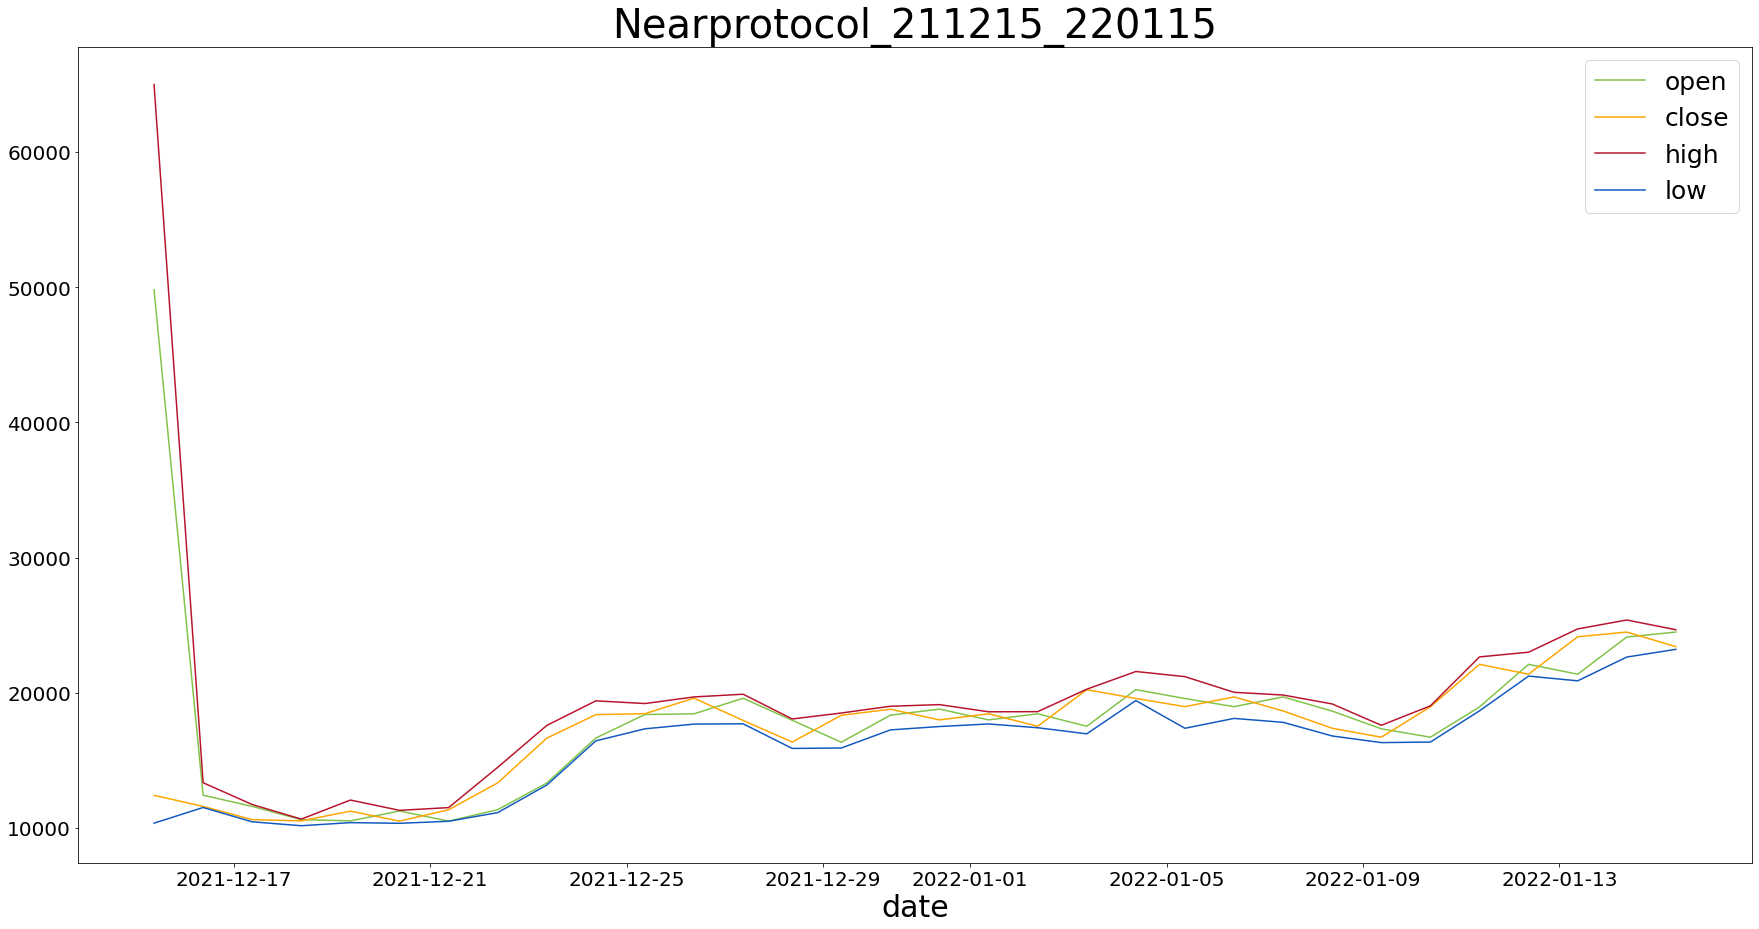

In [21]:
plt.figure(figsize=(30, 15))
plt.title("Nearprotocol_211215_220115", fontsize=40)
plt.plot(near_er_ir.date, near['open'], "#81C349")
plt.plot(near_er_ir.date, near['close'], "#FFA500")
plt.plot(near_er_ir.date, near['high'], "#B7142D")
plt.plot(near_er_ir.date, near['low'], "#1259BF")
plt.xlabel('date', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['open', 'close', 'high', 'low'], prop={'size': 25})
plt.show()

## 환율

C:\Users\hmin0\AppData\Local\Temp/ipykernel_2988/3028546892.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1_ylabels)


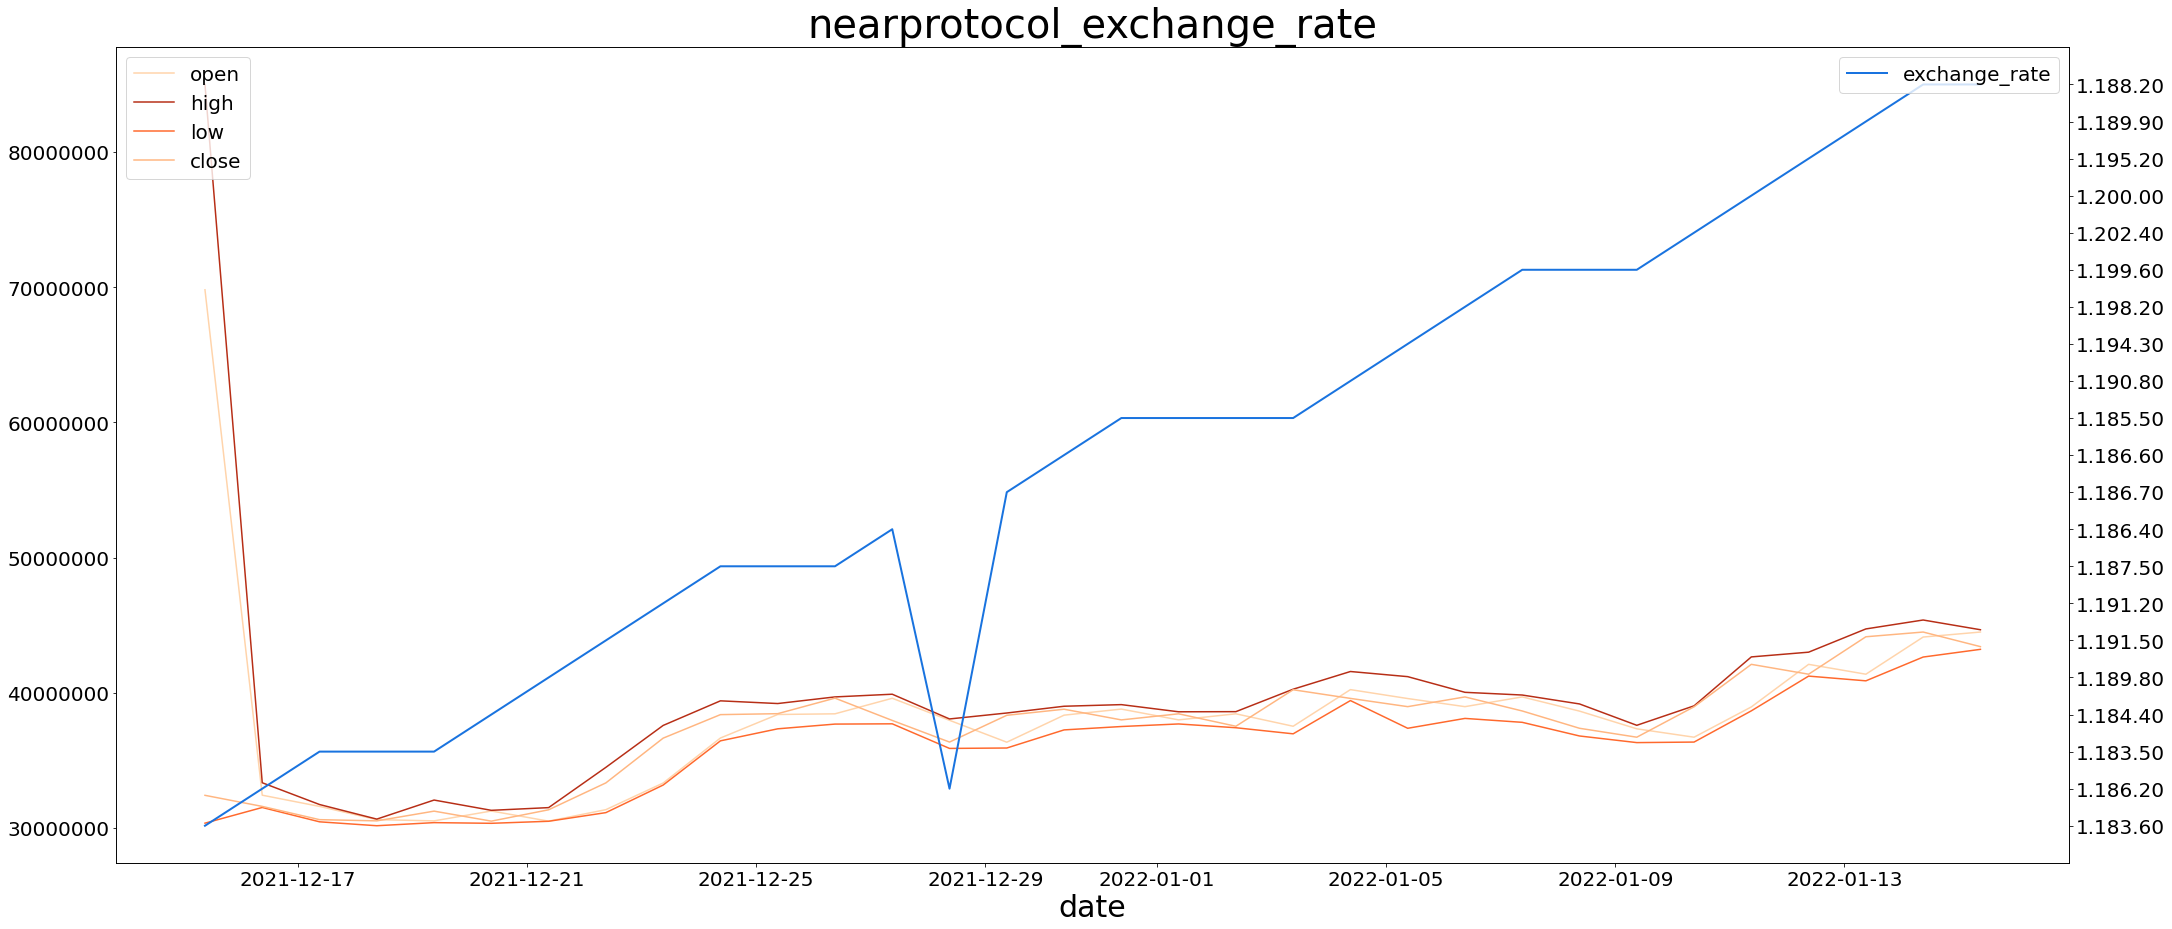

In [22]:
%matplotlib inline
x = near_er_ir.date
y1 = near_er_ir.open
y2 = near_er_ir.high
y3 = near_er_ir.low
y4 = near_er_ir.close
y5= near_er_ir.won

plt.rcParams['figure.figsize'] = (35, 15)

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='#FFD4AB', label='open')
ax1.plot(x, y2, color='#B72E16', label='high')
ax1.plot(x, y3, color='#FF692D', label='low')
ax1.plot(x, y4, color='#FFB681', label='close')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('date', fontsize=30) 
#ax1.set_ylabel(['open', 'high', 'low', 'close'], fontsize=25) 
ax1.set_title('nearprotocol_exchange_rate', fontsize=40)
ax1.legend(loc=2, fontsize=20)
ax1_ylabels = ["", 30000000, 40000000, 50000000, 60000000, 70000000, 80000000]
ax1.set_yticklabels(ax1_ylabels)

ax2= ax1.twinx()
ax2.plot(x, y5, color='#1973DF', linewidth=2.0, label='exchange_rate')
ax2.tick_params(axis='y',labelsize=20)
ax2.legend(loc=1, fontsize=20)
#ax2.set_ylim([1083.10, 1199.10 ]) #수정필요
#plt.savefig('bitcoin_exchange_rate.png', facecolor='#eeeeee')
plt.show()

## 금리

C:\Users\hmin0\AppData\Local\Temp/ipykernel_2988/2354451121.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1_ylabels)


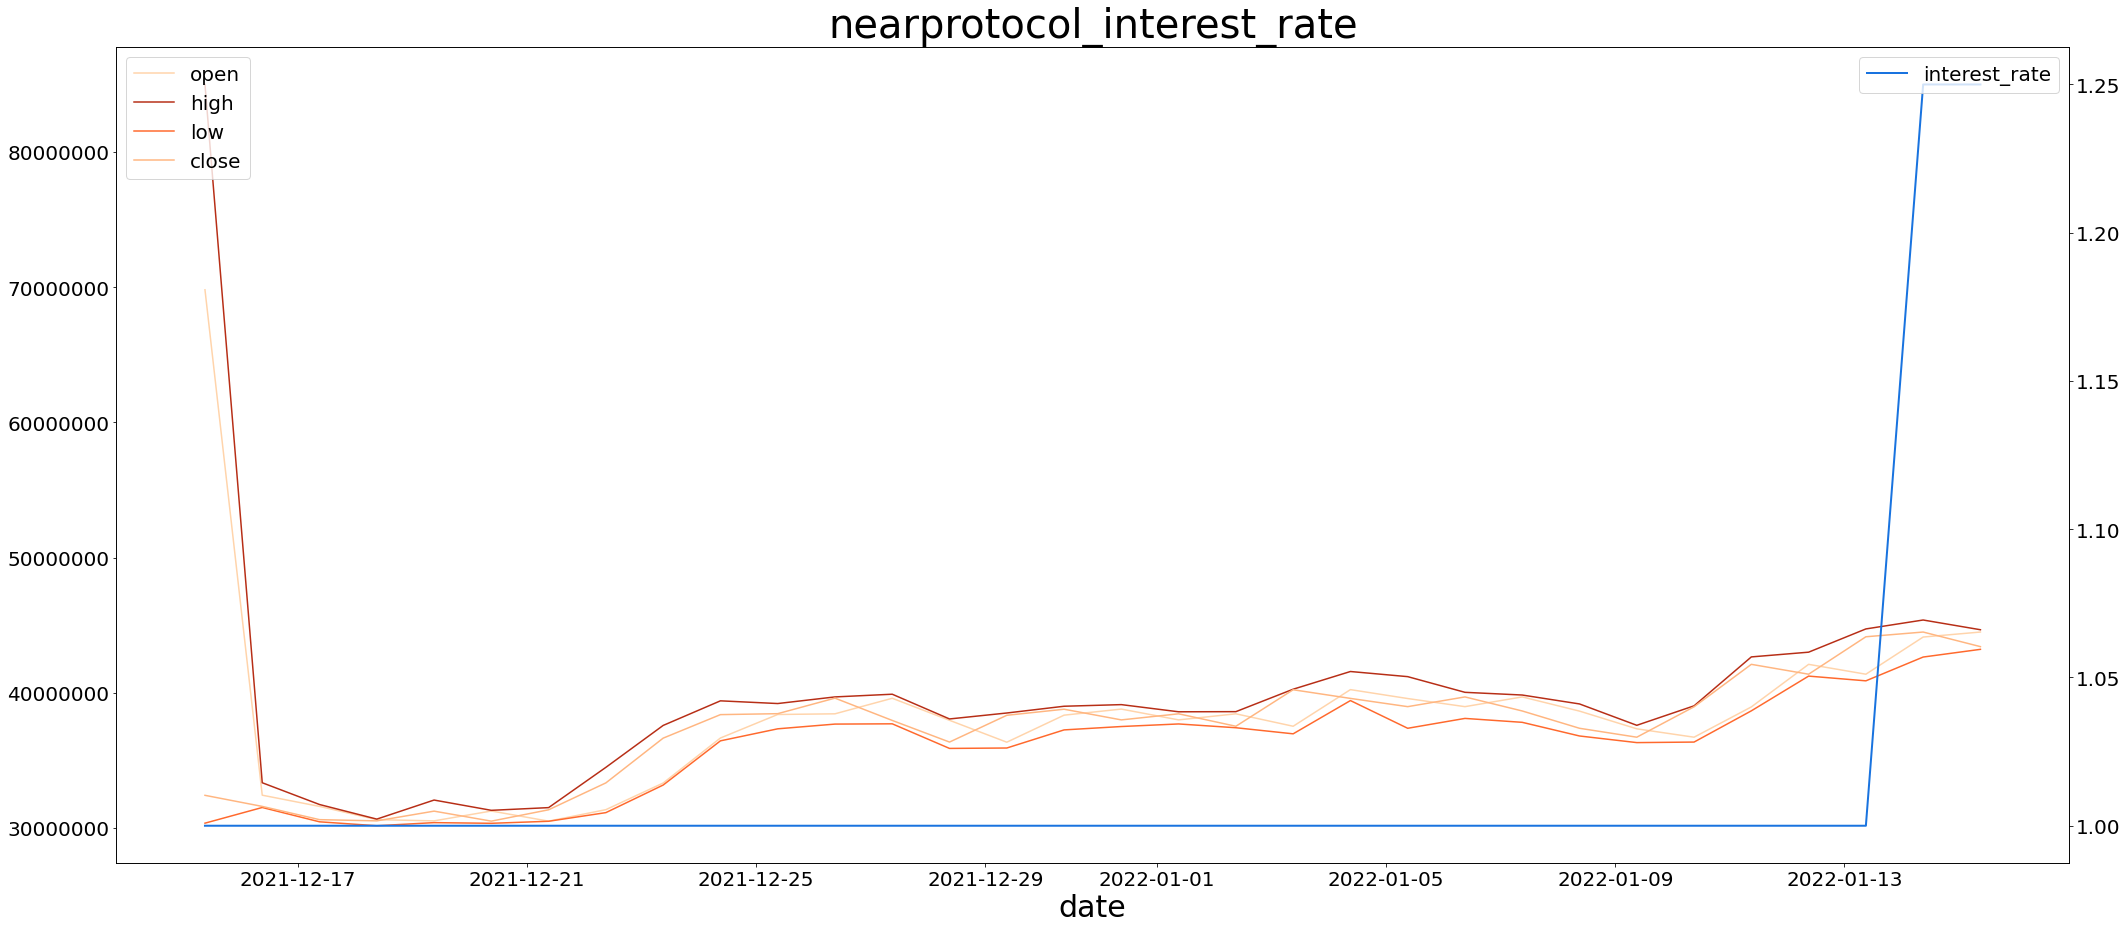

In [23]:
%matplotlib inline
x = near_er_ir.date
y1 = near_er_ir.open
y2 = near_er_ir.high
y3 = near_er_ir.low
y4 = near_er_ir.close
y5= near_er_ir.percent

plt.rcParams['figure.figsize'] = (35, 15)

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='#FFD4AB', label='open')
ax1.plot(x, y2, color='#B72E16', label='high')
ax1.plot(x, y3, color='#FF692D', label='low')
ax1.plot(x, y4, color='#FFB681', label='close')
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('date', fontsize=30) 
#ax1.set_ylabel(['open', 'high', 'low', 'close'], fontsize=25) 
ax1.set_title('nearprotocol_interest_rate', fontsize=40)
ax1.legend(loc=2, fontsize=20)
ax1_ylabels = ["", 30000000, 40000000, 50000000, 60000000, 70000000, 80000000]
ax1.set_yticklabels(ax1_ylabels)

ax2= ax1.twinx()
ax2.plot(x, y5, color='#1973DF', linewidth=2.0, label='interest_rate')
ax2.tick_params(axis='y',labelsize=20)
ax2.legend(loc=1, fontsize=20)
#ax2.set_ylim([1083.10, 1199.10 ]) #수정필요
#plt.savefig('bitcoin_exchange_rate.png', facecolor='#eeeeee')
plt.show()

## 한달거래량과 종가(추세)

In [24]:
near_sample = pd.read_csv("data/최종/near_211215_220115.csv")
near_sample = near_sample.drop(near_sample.columns[0], axis=1)
near_sample= near_sample.set_index("date")
near_sample = near_sample.drop(["open","high","low", "value"], axis=1)
near_sample

,close,volume
date,,
2021-12-15 09:00:00,12410.00,32488905.84
2021-12-16 09:00:00,11590.00,10266687.36
2021-12-17 09:00:00,10610.00,5232049.38
2021-12-18 09:00:00,10520.00,2229216.58
2021-12-19 09:00:00,11240.00,7394495.47
2021-12-20 09:00:00,10500.00,2183190.53
2021-12-21 09:00:00,11340.00,2963896.06
2021-12-22 09:00:00,13330.00,18721431.42
2021-12-23 09:00:00,16640.00,50242950.86


In [25]:
near_sample.index = near_sample.index.str.replace(" 09:00:00", "")
near_sample

,close,volume
date,,
2021-12-15,12410.00,32488905.84
2021-12-16,11590.00,10266687.36
2021-12-17,10610.00,5232049.38
2021-12-18,10520.00,2229216.58
2021-12-19,11240.00,7394495.47
2021-12-20,10500.00,2183190.53
2021-12-21,11340.00,2963896.06
2021-12-22,13330.00,18721431.42
2021-12-23,16640.00,50242950.86


In [30]:
#near_sample.to_csv("data/final/near_close_volume.csv")

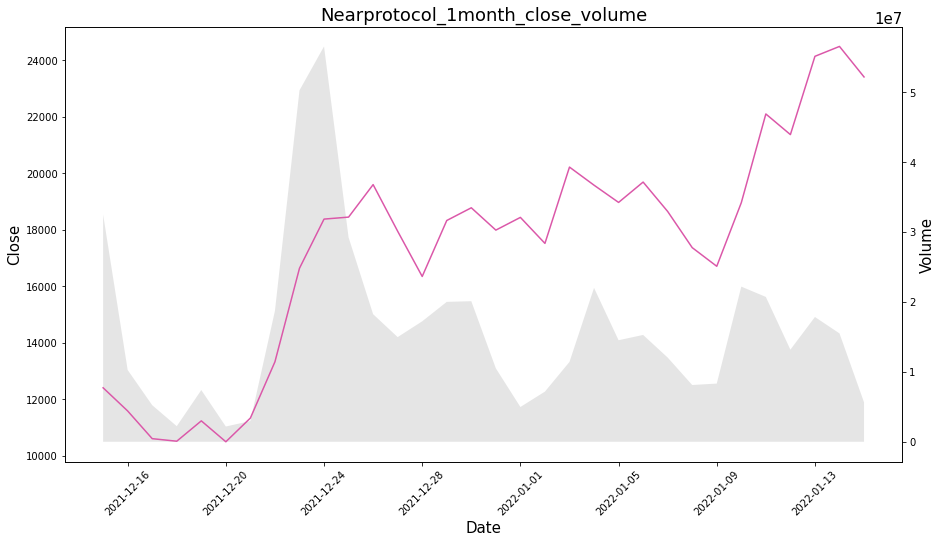

In [26]:
from matplotlib import dates

plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = (15)

x = near_sample.index
y1 = near_sample.close
y2 = near_sample.volume

fig, ax1 = plt.subplots()
ax1.xaxis.set_major_locator(dates.DayLocator(interval=4))
plt.xticks(rotation=45)
ax1.plot(x, y1, color="#db58a9")
ax1.set_ylabel('Close')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)

ax2 = ax1.twinx()
ax2.plot(x, y2, label="volume", linewidth=0)
ax2.set_ylabel('Volume')
ax2.tick_params(axis='y', labelsize=10)
plt.fill_between(x, y2, 0, alpha=0.2, facecolor='grey', antialiased=True)


ax1.set_zorder(ax1.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.title("Nearprotocol_1month_close_volume")
plt.show()

In [27]:
dsr = near_sample.pct_change(1)

In [28]:
dsr.std()

close    0.09
volume   1.19
dtype: float64

In [29]:
dcsr = (dsr+1).cumprod()-1